# Data Loading Using Pymongo

In [ ]:
import pymongo
from pymongo import MongoClient
print(pymongo.version)

4.6.2


In [ ]:
client = MongoClient('localhost',27017)

In [ ]:
all_db = client.list_database_names()
print(all_db)

['admin', 'config', 'internal_assignment-2', 'local', 'tata_online_retail', 'week3', 'week4']


In [ ]:
db = client['tata_online_retail']

In [ ]:
all_collection = db.list_collection_names()
print(all_collection)

['sales']


In [ ]:
collection = db['sales']

In [ ]:
num_documents = collection.count_documents({})
unique_fields = set()
for document in collection.find():
    unique_fields.update(document.keys())
num_fields = len(unique_fields)

In [ ]:
print("Number of documents (rows) =",num_documents)
print("Number of fields (columns) =",num_fields)

Number of documents (rows) = 541909
Number of fields (columns) = 9


# Data Analysis

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [70]:
df = pd.read_csv('sales_data.csv',encoding = "unicode_escape")

In [71]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [72]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [73]:
df.shape

(541909, 8)

# Data Cleaning

Duplicates, missing values, and null values checking, dropping, and replacing

In [74]:
df.duplicated().sum()

np.int64(5268)

In [75]:
df = df.drop_duplicates()

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [78]:
df.shape

(536641, 8)

In [79]:
copy = df.copy()
copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [80]:
df['Description'] = df['Description'].fillna("Unknown")
df['CustomerID'] = df['CustomerID'].fillna(0)

In [81]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [82]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


Outlier Identification

<Axes: ylabel='UnitPrice'>

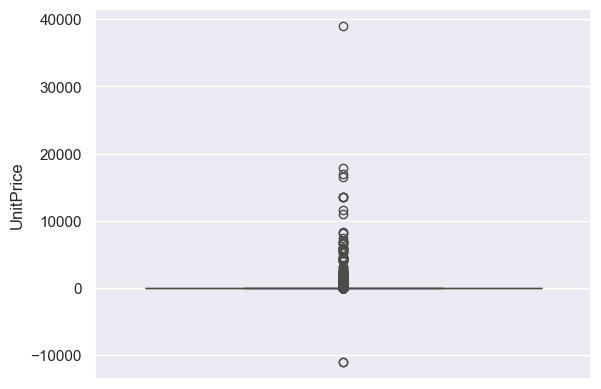

In [84]:
#Check Unit Price`s Distribution
sns.boxplot(y = 'UnitPrice', data=df)

From the boxplot we can see that the column “UnitPrice” has values
below 0, which is unusual.

In [85]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,0.0,United Kingdom


When looking at the description rows, with ‘UnitPrice’ designated with
the value of 0, it can be seen that it the data of debt adjustment, i.e.
payment of pending payment. The debt data is not required since those
rows were for clearing of debts and Price cannot be of negative nature, they are dropped henceforth.

In [86]:
df[df['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,12-08-2011 14:50,11062.06,0.0,United Kingdom
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,0.0,United Kingdom


In [87]:
df = df[df['UnitPrice']>0]

In [88]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [89]:
#check the minimum
df['UnitPrice'].min()

np.float64(0.001)

<Axes: ylabel='Quantity'>

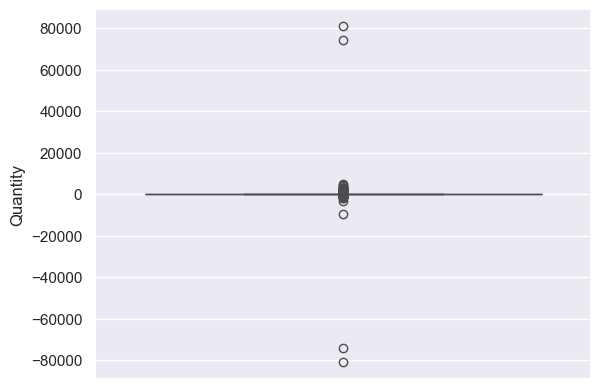

In [90]:
sns.boxplot(y = 'Quantity', data=df)

An observation can be drawn that there are rows where Quantity is
below 0 which occur when a purchase is cancelled by the customer. Since, only the sales data is being analyzed it is safe to drop the
cancelled orders.

In [91]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


The cancelled purchase data is stored separately in case it is required
down the line

In [92]:
cancelled_purchases = df[df['Quantity'] < 0]

In [93]:
cancelled_purchases.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [94]:
cancelled_purchases.shape

(9251, 8)

In [95]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [96]:
df = df[df['Quantity']>0]

In [97]:
df['Quantity'].min()

np.int64(1)

In [98]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

The datatype of the column InvoiceDate is converted to ensure
the compatibility of the column with the dataset and to use it for feature
extraction purposes.

In [99]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [100]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [101]:
df.shape

(524878, 8)

# Feature Extraction

In [102]:
#creating a separate column for time
df['Time'] = df['InvoiceDate'].dt.time
#creating a separate column for month
df['Month'] = df['InvoiceDate'].dt.month_name()
#creating a separate column for day name
df['Day'] = df['InvoiceDate'].dt.day_name()
#creating a column for year
df['Year']= df['InvoiceDate'].dt.year

In [103]:
#creating a column for total
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

A total of 5 new features/columns have been added to the data.

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


In [105]:
df.shape

(524878, 13)

In [106]:
#Saving the cleaned data in a new file
df.to_csv('cleaned_sales_data.csv')

# Data Analysis

In [107]:
years = df['Year'].unique()
print(years)

[2010 2011]


**Demographic Analysis**

In [108]:
total_countries = df['Country'].nunique()
print("Total number of countries:", total_countries)

Total number of countries: 38


In [109]:
country = df['Country'].value_counts().reset_index(drop=False).head(38)
country.columns = ['Country', 'Counts']
total_sales = country['Counts'].sum()
country['SalesPercent'] = (country['Counts'] / total_sales) * 100

In [110]:
country.head(10)

,Country,Counts,SalesPercent
0,United Kingdom,479985,91.446965
1,Germany,9025,1.719447
2,France,8392,1.598848
3,EIRE,7879,1.501111
4,Spain,2479,0.472300
5,Netherlands,2359,0.449438
6,Belgium,2031,0.386947
7,Switzerland,1958,0.373039
8,Portugal,1492,0.284257
9,Australia,1181,0.225005


C:\Users\Adhish\AppData\Local\Temp\ipykernel_17080\2216795519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Counts', data=top_10_countries, palette='muted')


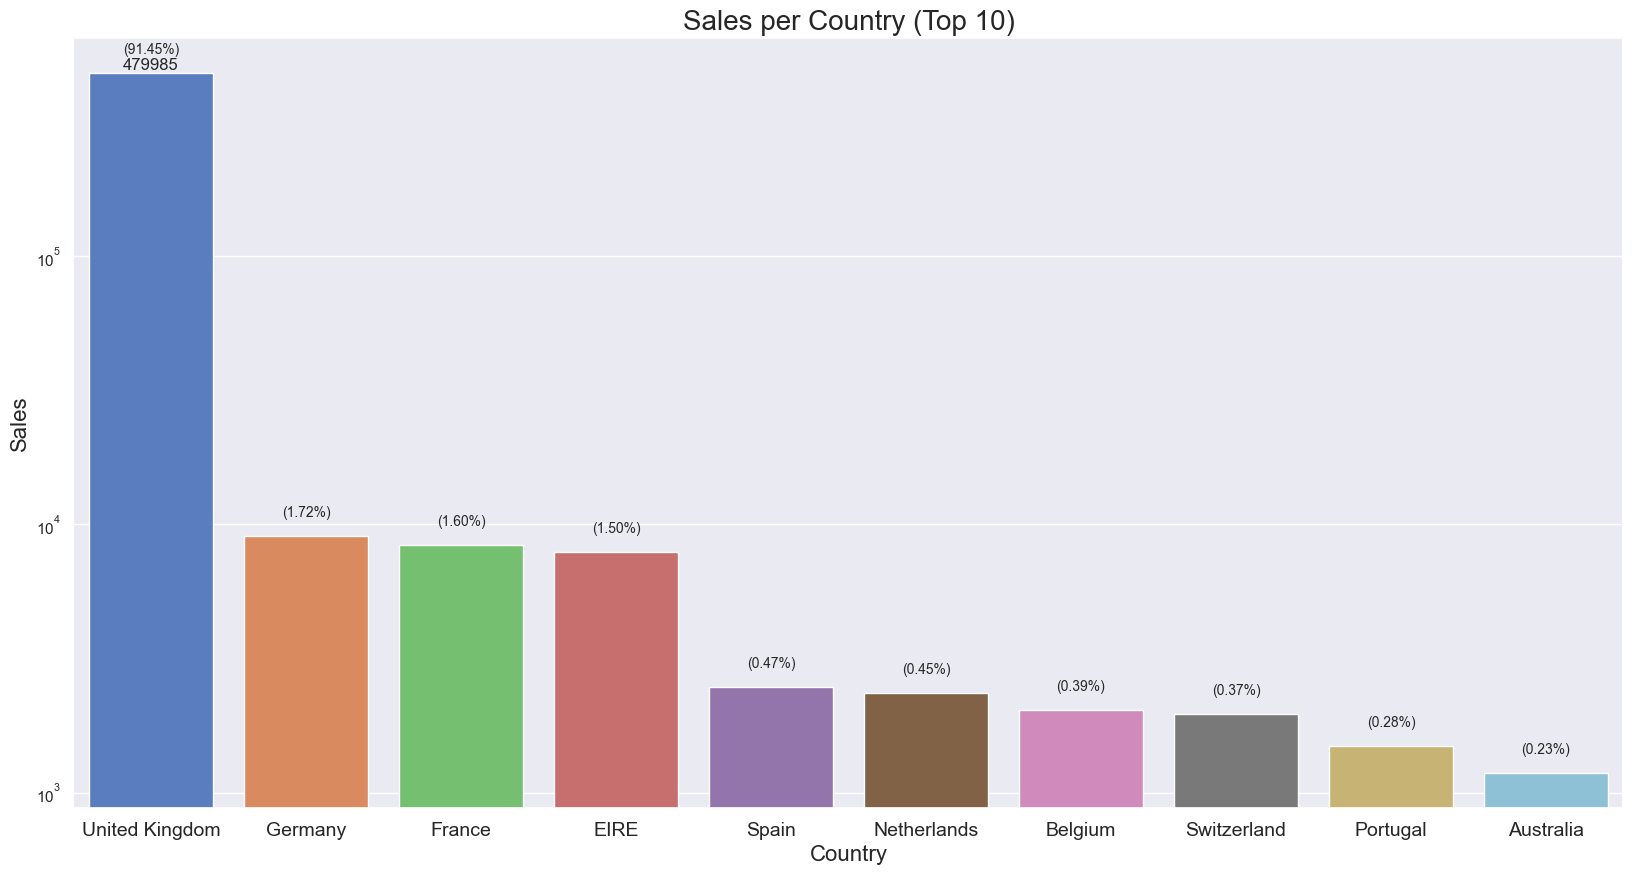

In [111]:
plt.figure(figsize=(20, 10))
top_10_countries = country.head(10)
ax = sns.barplot(x='Country', y='Counts', data=top_10_countries, palette='muted')
ax.bar_label(ax.containers[0])
for i in range(len(top_10_countries)):
    ax.text(i, top_10_countries['Counts'][i] * 1.15, f'({top_10_countries["SalesPercent"][i]:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.title("Sales per Country (Top 10)", fontsize=20)
plt.ylabel("Sales", fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.xticks(fontsize=14)
plt.yscale('log')
plt.show()

From the plot above it can be seen that the United Kingdom contributes
to the most sales out of all the countries (91.45% of total sales), followed
by Germany and France (1.72% and 1.6% respectively). The key
takeaway from the graph is that most of customer from the United
Kingdom contribute the most in terms of product sales and revenue
earned.
Thus, the business should look upon maintaining its already existing
status in the United Kingdom’s market, while also setting its sight on
expanding to other countries for increasing sales and revenue.

**Timings Analysis**

In [112]:
monthly_sales = df.groupby([pd.Grouper(key='Year'), pd.Grouper(key='Month')])['TotalPrice'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Year': 'Year', 'Month': 'Month', 'TotalPrice': 'TotalRevenue'})

In [113]:
revenue_in_2010 = monthly_sales[monthly_sales['Year'] == 2010]
revenue_in_2011 = monthly_sales[monthly_sales['Year'] == 2011]

In [114]:
#list of years to know which years are present
years = df['Year'].unique()
print(years)

[2010 2011]


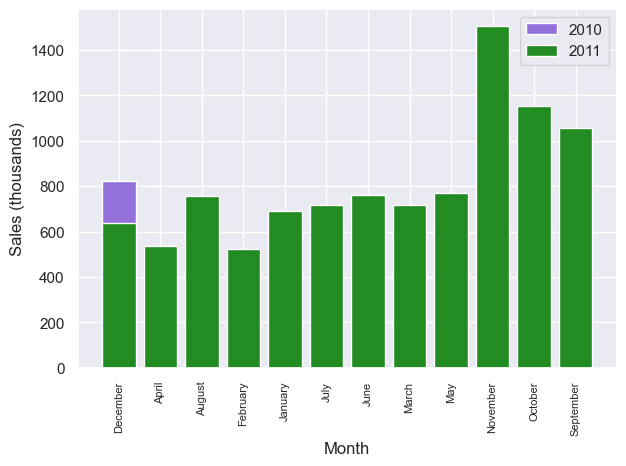

In [115]:
plt.bar(revenue_in_2010["Month"], revenue_in_2010['TotalRevenue'] / 1000, label='2010', color='mediumpurple')
plt.bar(revenue_in_2011["Month"], revenue_in_2011['TotalRevenue'] / 1000, label='2011', color='forestgreen')
plt.xticks(rotation='vertical', size=8)
plt.ylabel("Sales (thousands)")
plt.xlabel("Month")
plt.legend()
plt.tight_layout(pad=1)
plt.show()

From the bar plot and the above data, we can see that in the year 2011,
November is the month with the highest sales with 1503.9 thousand
revenues from sales, followed by October (1151.3 thousand) and
September (1056.4 thousand).
While on the other hand February and April had the lowest sales with 522.5
thousand and 537 thousand revenues earned respectively.
This trend suggests various real-world factors might affect the sales amount.
Events such as Black Friday, which happens the next Friday after
Thanksgiving, occur in the month of November where generous discounts
are offered, skyrocketing the number of sales, and earned revenue.
During the month of October, the country of Germany celebrates
Oktoberfest which increases the purchase of products from consumers from
the country. This also places the country as the second most country
contributing to product sales as seen in one of the previous charts.
Finally, the month of September is the back-to-school season, meaning
students are looking for newer school supplies and electronics in
preparation for the new school year.
While talking about the lower sales in February, one of the factors can be it
being the post festivities month as it comes after Christmas and the New46
Years. Thus, people might be looking to spend less money as they most
likely spent it during the holidays season.

In [116]:
print("Revenue in 2010:")
for month, revenue_2010 in zip(revenue_in_2010["Month"], revenue_in_2010['TotalRevenue'] / 1000):
    print(f"{month}: {revenue_2010:.1f} thousand")

print("\nRevenue in 2011:")
for month, revenue_2011 in zip(revenue_in_2011["Month"], revenue_in_2011['TotalRevenue'] / 1000):
    print(f"{month}: {revenue_2011:.1f} thousand")

Revenue in 2010:
December: 821.5 thousand

Revenue in 2011:
April: 537.0 thousand
August: 757.8 thousand
December: 637.8 thousand
February: 522.5 thousand
January: 689.8 thousand
July: 718.1 thousand
June: 760.5 thousand
March: 716.2 thousand
May: 769.3 thousand
November: 1503.9 thousand
October: 1151.3 thousand
September: 1056.4 thousand


In [117]:
days = df.groupby('Day').agg({'TotalPrice': 'sum'}).reset_index()

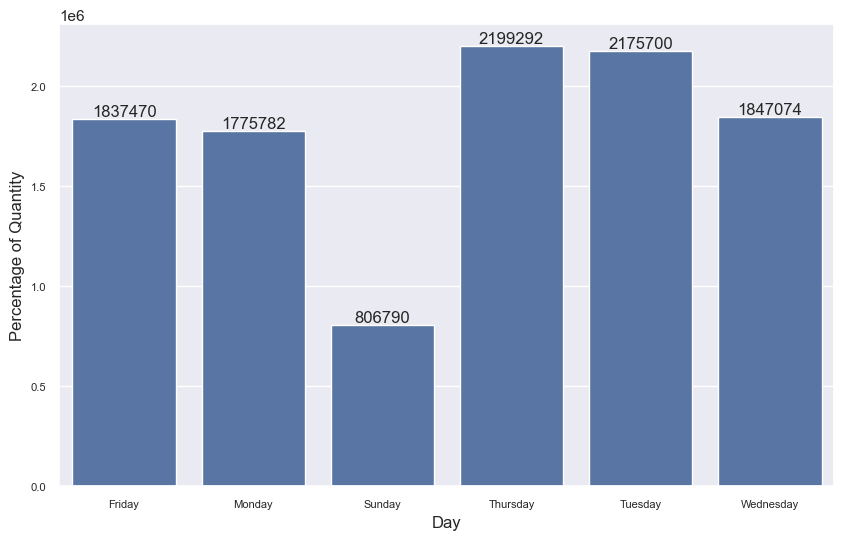

In [118]:
total_quantity = days['TotalPrice'].sum()
days['Quantity_percent'] = (days['TotalPrice'] / total_quantity) * 100

sns.set_theme(style="whitegrid")
sns.set()
plt.figure(figsize=(10, 6))
a = sns.barplot(x='Day', y='TotalPrice', data=days)
a.set_ylabel('Percentage of Quantity')
a.tick_params(labelsize=8)
for container in a.containers:
    a.bar_label(container, fmt='%d')
plt.show()

It can be seen that there are sales data for 6 days of the week barring
the transaction of Saturdays, maybe due to Saturdays being an off day.
From the plot it can also be observed that most of the sales transactions
of the business occur during Thursdays, Tuesdays, and Wednesdays.
Next, the data of peak sales hours can be extracted.

In [119]:
days = df.groupby('Day').agg({'Quantity': 'sum'}).reset_index()
days

,Day,Quantity
0,Friday,890199
1,Monday,871148
2,Sunday,465509
3,Thursday,1207384
4,Tuesday,1113087
5,Wednesday,1025093


In [120]:
total_quantity = days['Quantity'].sum()
days['Quantity_percent'] = (days['Quantity'] / total_quantity) * 100

C:\Users\Adhish\AppData\Local\Temp\ipykernel_17080\3260627344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Quantity_percent', data=days, palette='muted')


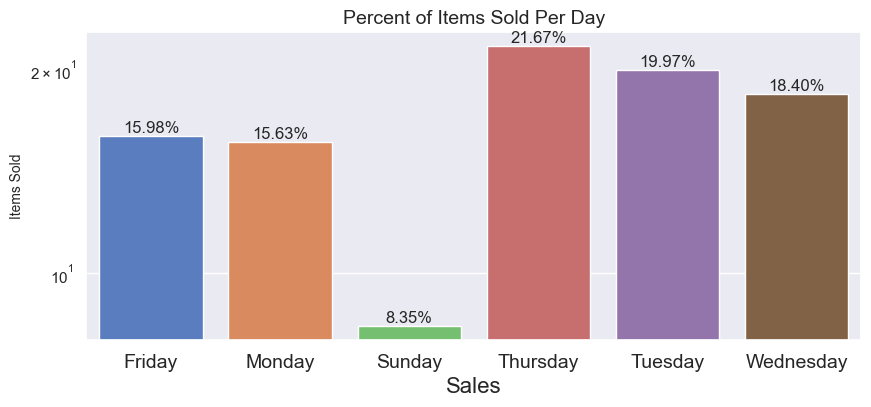

In [121]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Day', y='Quantity_percent', data=days, palette='muted')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')
plt.title("Percent of Items Sold Per Day", fontsize=14)
plt.ylabel("Items Sold", fontsize=10)
plt.xlabel('Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yscale('log')
plt.show()

In [122]:
df_customer_type = df[['CustomerID', 'InvoiceNo']].groupby(by=["CustomerID"]).count().reset_index()
regular_customer = len(df_customer_type[df_customer_type['InvoiceNo'] > 1])
print('Regular customers: '+str(regular_customer))
print('Total customers: '+str(len(df_customer_type)))
print('% of regular customers: '+str((regular_customer/len(df_customer_type))*100))

Regular customers: 4268
Total customers: 4339
% of regular customers: 98.36367826688178


In [123]:
#create a new column for hours from InvoiceDate
df['Hour']=df['InvoiceDate'].dt.hour

In [124]:
sales_hours = df.groupby('Hour').count().reset_index()

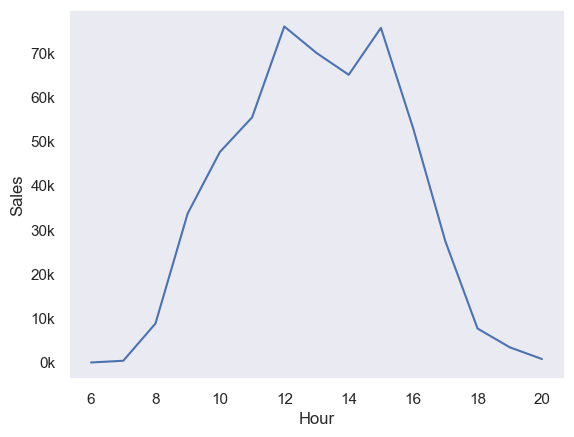

In [125]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(sales_hours['Hour'],sales_hours['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

According to the Line plot it can be observed that consumers tend to
purchase products between 12pm and 3pm. This signifies the customers
are most likely free to work breaks or recess and are on their mobile or
computer devices. Thus, pushing out more advertisements during the
hour window of 12pm and 3pm might prove to be beneficial in
showcasing more products to the existing customers as well as reaching
out to newer customers.

**Products Analysis**

In [126]:
top_products_revenue = df[['Description', 'TotalPrice']].groupby('Description').sum().sort_values('TotalPrice', ascending=False).head(10)
top_products_revenue = top_products_revenue.rename(columns={'TotalPrice': 'TotalRevenueFromItem'})
top_products_revenue.style.bar(align='mid', color='lime')

,TotalRevenueFromItem
Description,
DOTCOM POSTAGE,206248.770000
REGENCY CAKESTAND 3 TIER,174156.540000
"PAPER CRAFT , LITTLE BIRDIE",168469.600000
WHITE HANGING HEART T-LIGHT HOLDER,106236.720000
PARTY BUNTING,99445.230000
JUMBO BAG RED RETROSPOT,94159.810000
MEDIUM CERAMIC TOP STORAGE JAR,81700.920000
POSTAGE,78101.880000
Manual,77752.820000


The top selling product data can also be used to make advertisements
catered specifically towards the respective product, boosting the sales
of the product even more among the consumers.
Additionally, the unit prices of the top products can be adjusted based
on the market demands. If the demand for the products is high and the
availability of them in the market is less, the price of the product can be
bumped up a little to yield more profit.

In [127]:
top_products_quantity = df[['Description', 'Quantity']].groupby('Description').sum().sort_values('Quantity', ascending=False).head(10)
top_products_quantity.style.bar(align='mid', color='yellow')

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
JUMBO BAG RED RETROSPOT,48371
WHITE HANGING HEART T-LIGHT HOLDER,37872
POPCORN HOLDER,36749
PACK OF 72 RETROSPOT CAKE CASES,36396
ASSORTED COLOUR BIRD ORNAMENT,36362
RABBIT NIGHT LIGHT,30739


The above chart shows the highest selling products based on quantity.
Since these products are being sold in larger quantities the business
should always stock up on these high demand products. Stocking up on
these products ensures that the existing customers of the business don’t
have to go to other companies to purchase the product they need. This
also provides a sense of reliability to the customer towards the business
as they can always rely on the business to provide them with the product
they require. <br>
Next, relationships between products can also be established by
analyzing products which have been bought together most of the time

In [128]:
sold_together = df.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
sold_together

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
19955,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
19956,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
19957,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."
19958,581587,"CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIR..."


In [129]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in sold_together['Description']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(15):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 743
(' KEY FOB ', ' BACK DOOR  ') 544
(' KEY FOB ', ' SHED ') 511
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414
(' JUMBO STORAGE BAG SUKI ', ' JUMBO BAG RED RETROSPOT ') 399
(' LUNCH BAG RED RETROSPOT ', ' LUNCH BAG  BLACK SKULL. ') 393
(' JUMBO BAG RED RETROSPOT ', ' JUMBO  BAG BAROQUE BLACK WHITE ') 367
(' GREEN REGENCY TEACUP AND SAUCER ', ' PINK REGENCY TEACUP AND SAUCER ') 359
(' WOODLAND CHARLOTTE BAG ', ' RED RETROSPOT CHARLOTTE BAG ') 357


Hence, there is a huge number of customers buying products relevant
to each other at the same time. The business can capitalize on this
information and provide various offers to the customers. For example:
on the purchase of 3 ‘COFFEE’, 1 ‘SUGAR’ is given out for free, and
other similar offers to grow the sales.53
Additionally, customers can be recommended products based on their
purchase through the e-commerce platform. For example, when a
customer purchases a ‘KEY FOB’ the e-commerce platform can
recommend ‘BACK DOOR’, ‘SHED’, and ‘FRONT DOOR’ suggesting
them as items the customer might find useful or require.

**Customer Analysis**

In [130]:
df_customer = df.copy()

In [131]:
df_customer.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Time                   object
Month                  object
Day                    object
Year                    int32
TotalPrice            float64
Hour                    int32
dtype: object

In [132]:
df_customer = df_customer.drop(df_customer[df_customer['CustomerID'] == 0.0].index)

In [133]:
df_customer.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,TotalPrice,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,25.50,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,08:28:00,December,Wednesday,2010,11.10,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,08:28:00,December,Wednesday,2010,11.10,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,08:34:00,December,Wednesday,2010,54.08,8


In [134]:
df_customer_revenue = df_customer[['CustomerID', 'TotalPrice']].groupby('CustomerID').sum().sort_values('TotalPrice', ascending=False).head(10)
df_customer_revenue = df_customer_revenue.rename(columns={'TotalPrice': 'TotalRevenueFromCustomer'})
df_customer_revenue.style.bar(align='mid', color='aqua')

,TotalRevenueFromCustomer
CustomerID,
14646.000000,280206.020000
18102.000000,259657.300000
17450.000000,194390.790000
16446.000000,168472.500000
14911.000000,143711.170000
12415.000000,124914.530000
14156.000000,117210.080000
17511.000000,91062.380000
16029.000000,80850.840000


In [135]:
df_customer_orders = df_customer[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count().sort_values('InvoiceNo', ascending=False).head(10)
df_customer_orders = df_customer_orders.rename(columns={'InvoiceNo': 'TotalOrdersFromCustomer'})
df_customer_orders.style.bar(align='mid', color='lavender')

,TotalOrdersFromCustomer
CustomerID,
17841.000000,7676
14911.000000,5670
14096.000000,5111
12748.000000,4412
14606.000000,2677
15311.000000,2366
14646.000000,2076
13089.000000,1814
13263.000000,1667


In [136]:
df_customer_quantity = df_customer[['CustomerID', 'Quantity']].groupby('CustomerID').sum().sort_values('Quantity', ascending=False).head(10)
df_customer_quantity = df_customer_quantity.rename(columns={'Quantity': 'TotalPurchaseQuantityFromCustomer'})
df_customer_quantity.style.bar(align='mid', color='goldenrod')

,TotalPurchaseQuantityFromCustomer
CustomerID,
14646.000000,196915
16446.000000,80997
14911.000000,80240
12415.000000,77374
12346.000000,74215
17450.000000,69973
17511.000000,64549
18102.000000,64124
13694.000000,63312


Looking through the graph of top customers of different categories,
customers with the IDs 14646 and 14911 stand out by appearing in all
three of the top buyer categories.

In [137]:
id_14646 = df[df.CustomerID == 14646]
id_14646.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,TotalPrice,Hour
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,10:09:00,December,Monday,2010,3.48,10
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,10:09:00,December,Monday,2010,3.48,10
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,10:09:00,December,Monday,2010,9.90,10
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646.0,Netherlands,10:09:00,December,Monday,2010,1.95,10
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646.0,Netherlands,10:09:00,December,Monday,2010,1.70,10


In [138]:
id_14911 = df[df.CustomerID == 14911]
id_14911.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,TotalPrice,Hour
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,14:05:00,December,Wednesday,2010,39.8,14
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,14:05:00,December,Wednesday,2010,17.7,14
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,14:05:00,December,Wednesday,2010,15.3,14
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,14:05:00,December,Wednesday,2010,42.5,14
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,14:05:00,December,Wednesday,2010,13.5,14


It can be seen that both CustomerID 14646 and 14911 are not from the
top selling country, i.e. United Kingdom, rather both of the customers are
from Netherlands and EIRE (Ireland) respectively. This suggests that
both of the customers are businesses operating in their respective
countries by importing items through TATA e-commerce. With that in
mind e-commerce can extend its hand in partnership with these two
businesses. Establishing an international partnership will certainly help
the business to grow in the nation of Netherlands and EIRE. As the
partnership grows businesses from other nations might also be56
interested in partnership, which helps the business to make its presence
in the global market.

**Correlation Analysis**

In [139]:
df_corr = df[['Quantity', 'Month', 'Year', 'TotalPrice', 'UnitPrice']].copy()

#Converting String months to numerical
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df_corr['Month'] = df_corr['Month'].map(month_map)


In [140]:
df_corr = df_corr[['Quantity', 'Month', 'Year', 'TotalPrice', 'UnitPrice']].corr(method='spearman')
df_corr

,Quantity,Month,Year,TotalPrice,UnitPrice
Quantity,1.000000,-0.027629,0.052811,0.673648,-0.408682
Month,-0.027629,1.000000,-0.443157,-0.033275,-0.002547
Year,0.052811,-0.443157,1.000000,0.008526,-0.061506
TotalPrice,0.673648,-0.033275,0.008526,1.000000,0.335754
UnitPrice,-0.408682,-0.002547,-0.061506,0.335754,1.000000


<Axes: >

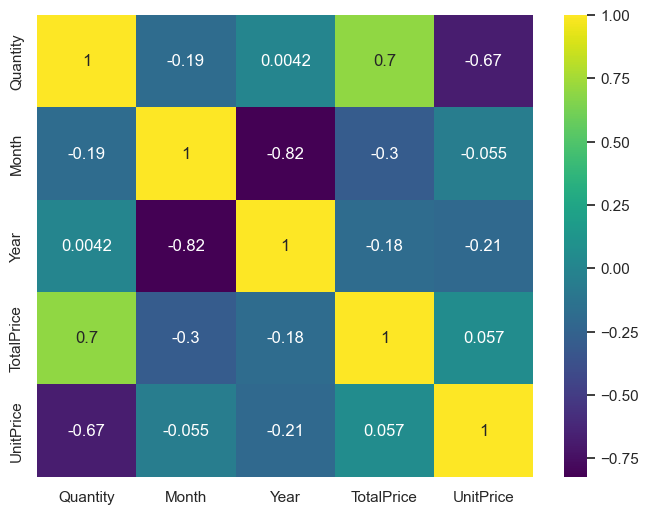

In [141]:
#visualizing using heatmap
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')

In the chart, yellow denotes a strong positive relationship, while on the
other end purple indicates a strong negative relationship. Similarly, the
colors in between denote little to no relationship.
From the chart, the key takeaways are the strong positive relationship
between the Quantity and the TotalPrice. As more quantity are sold the
more the TotalPrice obviously also goes up. Similarly, the more the item
is sold the less the UnitPrice gets, indicating discounts that might get
applied when items are purchased in a bulk. From this information sales
decisions can be made, such as planning the discount margin
beforehand for bulk purchases.

# Linear Regression

A regression model is built to predict how the sales in the upcoming 3
months may look like and analyze the business’s growth. The dataset
only contains half the sales data of December of 2011, so the prediction
will be drawn for December 2011, January 2012, and February 2012
using the data from December 2010 to November 2011.

In [142]:
df_reg = df[['Year', 'Month', 'TotalPrice']].copy()

month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df_reg['Month'] = df_reg['Month'].map(month_map)


In [143]:
df_pred = df_reg.groupby(['Month','Year']).sum()['TotalPrice'].reset_index()
df_pred

,Month,Year,TotalPrice
0,1,2011,689811.610
1,2,2011,522545.560
2,3,2011,716215.260
3,4,2011,536968.491
4,5,2011,769296.610
5,6,2011,760547.010
6,7,2011,718076.121
7,8,2011,757841.380
8,9,2011,1056435.192
9,10,2011,1151263.730


In [144]:
# since December 2011 is incomplete, dropping December 2011 data
df_pred = df_pred.drop(index= 12)
df_pred

,Month,Year,TotalPrice
0,1,2011,689811.610
1,2,2011,522545.560
2,3,2011,716215.260
3,4,2011,536968.491
4,5,2011,769296.610
5,6,2011,760547.010
6,7,2011,718076.121
7,8,2011,757841.380
8,9,2011,1056435.192
9,10,2011,1151263.730


In [145]:
X = df_pred[['Year','Month']]
y = df_pred['TotalPrice']

In [146]:
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size = 0.9)

In [147]:
X_train.head()

,Year,Month
11,2010,12
9,2011,10
1,2011,2
6,2011,7
4,2011,5


In [148]:
X_test.head()

,Year,Month
7,2011,8
2,2011,3


For the training data, the data of the months January, February, June,
July, and September are being used. While for the testing data, the data
of the months March and May are being used.

In [149]:
y_train.head()

11     821452.730
9     1151263.730
1      522545.560
6      718076.121
4      769296.610
Name: TotalPrice, dtype: float64

In [150]:
y_test.head()

7    757841.38
2    716215.26
Name: TotalPrice, dtype: float64

In [151]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Distribution of the TotalPrice feature

<Axes: xlabel='TotalPrice', ylabel='Count'>

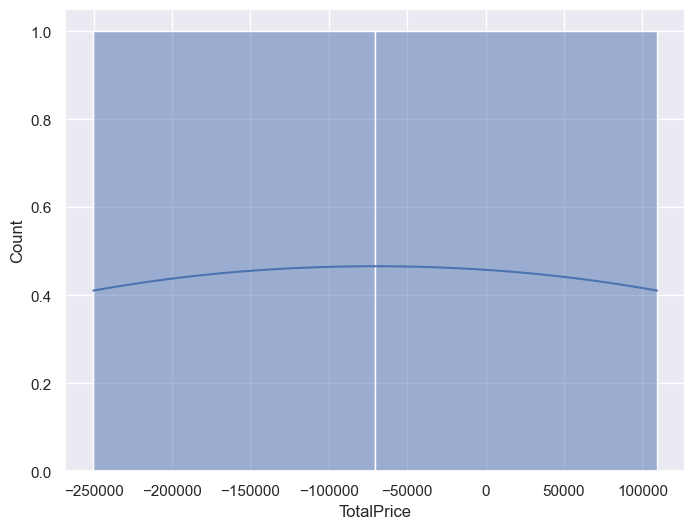

In [152]:
sns.histplot((y_test-lm.predict(X_test)), kde=True)

We can see a fairly uniform plot suggesting that the sales are evenly
distributed along the 20000 to 120000 range with a slight peak in the
middle. This indicates that the data quality is good, and the model will
capture a wide range of scenarios making the predictions more reliable

In [153]:
# we are making a forecast for the next 3 months
X_pred = np.array([[2011,12],[2012,1],[2012,2]])

In [154]:
y_pred = lm.predict(X_pred)

c:\Users\Adhish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [155]:
old_dec_sales = df_pred[(df_pred['Year'] == 2010) & (df_pred['Month'] == 12)]['TotalPrice'].values[0]
old_jan_sales = df_pred[(df_pred['Year'] == 2011) & (df_pred['Month'] == 1)]['TotalPrice'].values[0]
old_feb_sales = df_pred[(df_pred['Year'] == 2011) & (df_pred['Month'] == 2)]['TotalPrice'].values[0]

dec_per = (y_pred[0] - old_dec_sales) / old_dec_sales * 100
jan_per = (y_pred[1] - old_jan_sales) / old_jan_sales * 100
feb_per = (y_pred[2] - old_feb_sales) / old_feb_sales * 100

print(f'Sales Forecast for December 2011: {y_pred[0]} ({dec_per:.2f}% more compared to Dec 2010)')
print(f'Sales Forecast for January 2012: {y_pred[1]} ({jan_per:.2f}% more compared to Jan 2011)')
print(f'Sales Forecast for February 2012: {y_pred[2]} ({feb_per:.2f}% more compared to Feb 2011)')


Sales Forecast for December 2011: 1328961.6194024086 (61.78% more compared to Dec 2010)
Sales Forecast for January 2012: 954012.4299964905 (38.30% more compared to Jan 2011)
Sales Forecast for February 2012: 1034235.8917063475 (97.92% more compared to Feb 2011)


# Overall
From all the information acquired from the data analysis a lot of
information can be drawn out. TATA e-commerce’s customer base has
been found within 38 countries, out of which the United Kingdom holds
the greatest number of customers with a whopping 90% of the total
customers. This also correlates to United Kingdom being the main
revenue source of the business.<br><br>
Thus, it is recommended that the company looks upon expanding in
other countries as well. Whether it is by running advertisements in those
countries, running marketing campaigns, or collaborating with local
businesses native to other countries. More emphasis on the point of
collaborating with local businesses as from the data, we also have the
information that our top buyers are businesses from other countries
(Netherlands and EIRE). Collaborating with those businesses can prove
to be beneficial for our business as this expands the market of the
business and helps to reach out to customers who were previously
unreachable.<br><br>
A membership program can also be launched in order to promote loyalty
of the customer towards the business and potentially increase
customers through word of mouth.<br><br>
Similarly, various offers can be provided during peak months (November,
October, September). The offers can also be made during peak sales
hours, calling it rush hours. The rush hours offer can make the customers
think about buying something they didn’t consider buying just because it
is available in value for the small-time window.
Finally, all these offers won’t work without the customers knowing about
them. Thus, the business should highly prioritize the marketing of the
products and pumping out advertisements for the products, especially
during the peak hours.